<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Classification Art Category</title>
    <style>
        body {
            margin: 0;
            padding: 0;
            display: flex;
            flex-direction: column;
            align-items: center;
            background-color: #000;
            color: white;
        }
        h1 {
            font-size: 5em;
            font-weight: bold;
            text-align: center;
        }
    </style>
</head>
<body>
    <h1>Classification Art Category</h1>
</body>
</html>

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Sommaire - Classification Art</title>
    <style>
        body {
            margin: 0;
            padding: 0;
            display: flex;
            flex-direction: column;
            justify-content: center;
            align-items: center;
            height: 100vh;
            background-color: #000;
            color: white;
            font-family: Arial, sans-serif;
        }
        h1 {
            font-weight: bold;
            text-align: center;
            margin-bottom: 20px;
            font-size: 3em;
        }
        ul {
            list-style-type: none;
            text-align: center;
            font-size: 2em;
            line-height: 2em;
            margin: 0;
            padding: 0;
        }
    </style>
</head>
<body>
    <h1>Sommaire</h1>
    <ul>
        <li>1. Présentation de la base de données</li>
        <li>2. DataLoader et Data Augmentation</li>
        <li>3. Reseau FC</li>
        <li>4. Reseau CNN</li>
        <li>5. Transfer Learning</li>
    </ul>
</body>
</html>

pas touché les couches de batch lors du finetuning

# **Introduction**

- Le projet **P1 - Projet de classification** a pour objectif de développer une solution permettant de classifier des images dans des catégories originales définies par l'utilisateur. Dans le cadre de ce projet, notre thématique est la reconnaissance des mouvements d'art.

- Les mouvements d'art que nous avons choisis sont au nombre de 13, comprenant des catégories variées telles que **Realism**, **Japanese art**, **Symbolism**, **Expressionism**, entre autres. Chaque mouvement artistique possède des caractéristiques visuelles et esthétiques distinctes, ce qui en fait un défi intéressant pour une classification automatisée.

- Une fois la base d'images définie et validée, les étapes suivantes consistent à exploiter des outils et techniques avancés pour préparer et entraîner les modèles. Cela inclut la mise en place d'un **DataLoader** et l'utilisation de techniques de **Data Augmentation** pour enrichir les données d'entraînement. Les performances des modèles sont ensuite analysées en utilisant différents types de réseaux : les réseaux entièrement connectés (FC), les réseaux convolutifs (CNN), et enfin, le Transfer Learning avec des architectures pré-entraînées comme MobileNetV2.

# **Présentation de la base de données**

## **Présentation des différentes classes**

Lors du lancement du projet, nous avons cherché des mouvements d'art adéquats pour notre thématique. L'idée était de se concentrer principalement sur des mouvements liés à la peinture afin de faciliter la tâche de classification et d'éviter différents types d'art tels que la sculpture, la poterie ou autres. 

Sachant que nous faisions face à notre première contrainte liée à la nécessité d'avoir un nombre de classes supérieur à 8, nous avons identifié un total de 13 mouvements d'art différents. Ces mouvements varient en popularité, allant du **Symbolism** au **Baroque**. Parmi ces mouvements, on retrouve divers thèmes récurrents tels que l'humain, la nature, et la religion. Par exemple, dans le cadre des peintures centrées sur l'humain, les œuvres du **Rococo** et du **Romanticism** mettent particulièrement en avant des représentations de figures humaines dans des contextes variés.

Nous avons ensuite recherché suffisamment d'exemples de peintures pour garantir l'efficacité de notre modèle. L'objectif fixé était de collecter 600 peintures par catégorie. Malgré la difficulté à atteindre cet objectif pour certains mouvements moins communs comme le **Rococo**, nous avons réussi à finaliser notre base de données grâce à des sources telles que Flickr, qui a été une ressource majeure dans cette collecte.


## **Collecte des images**

La collecte des différentes images pour constituer notre base de données a nécessité plus de deux semaines de travail, totalisant environ une quinzaine d'heures de recherche active.

Cependant, certains mouvements d'art étaient particulièrement difficiles à compléter, notamment en raison de leur moindre popularité. Pour pallier ces difficultés, nous avons consacré entre 1 et 2 heures supplémentaires à explorer d'autres moyens de collecte, tels que des bases publiques alternatives ou des recherches manuelles sur des plateformes d'images. Ces efforts ont permis de garantir une base de données équilibrée, toujours avec cet objectif de 600 images par catégorie.

In [1]:
import os
import matplotlib.pyplot as plt
import random
from PIL import Image

# Chemin vers le dossier contenant la base de données
dataset_path = "dataset_600"

# Récupérer les classes (dossiers) dans le répertoire
classes = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))]

# Initialiser les données pour le graphique
class_counts = {}
sample_images = []

for class_name in classes:
    class_path = os.path.join(dataset_path, class_name)
    files = os.listdir(class_path)
    class_counts[class_name] = len(files)
    
    # Prendre quelques images aléatoires pour l'affichage
    sample_images.extend([os.path.join(class_path, f) for f in random.sample(files, min(3, len(files)))])

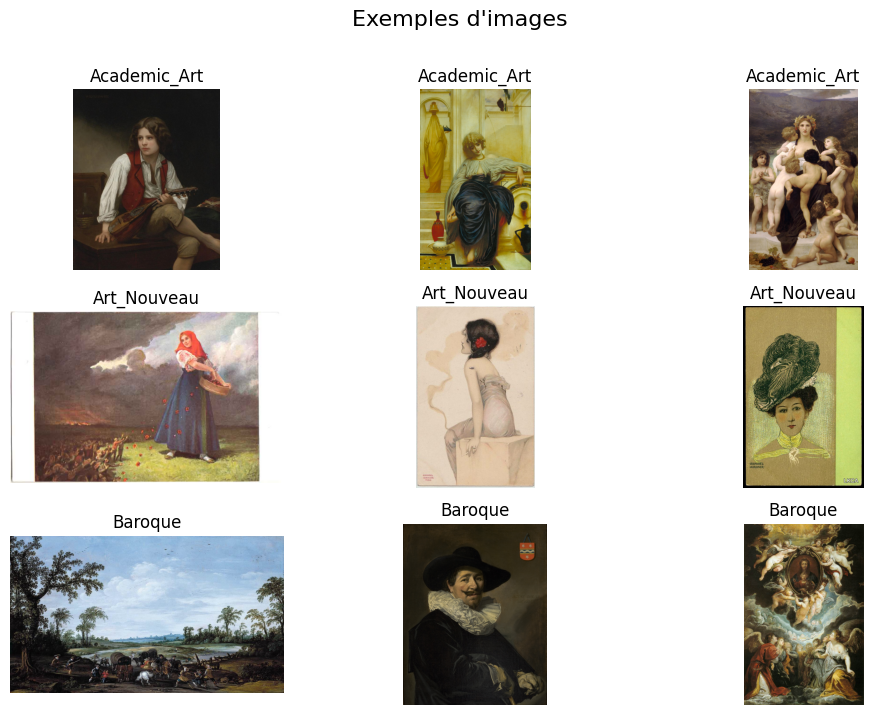

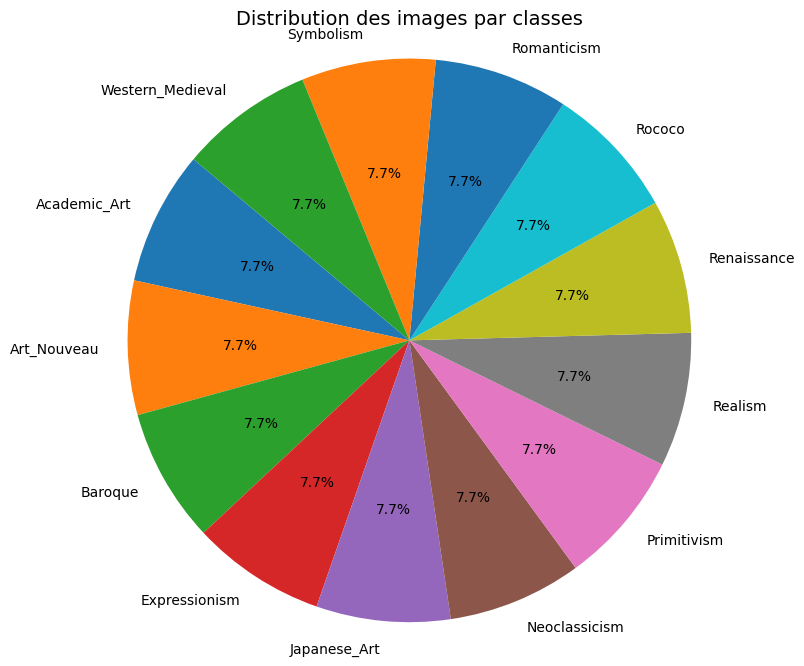

In [2]:
from ArtLib.artlib import show_sample_images,plot_pie_chart

# Affichage des résultats
show_sample_images(sample_images)
plot_pie_chart(class_counts)

# **DataLoader et DataAugmentation**

### **Mise en place du DataLoader**

- **Chargement des données :** Utilisation de image_dataset_from_directory pour charger les images du répertoire, avec redimensionnement automatique à ```128x128 pixels```.

- **Ensembles d'entraînement/validation :** Division automatique ```(80%/20%)``` des données grâce à l'argument validation_split.

- **Classes détectées :** Identification automatique des mouvements d'art via les noms des sous-dossiers.

- **Batching :** Création de lots de ```64 images```, prêts pour le processus d'apprentissage.

- **Visualisation :** Fonction show_samples pour afficher un batch d'images avec leurs étiquettes pour validation visuelle.

In [3]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import numpy as np

In [4]:
INPUT_SHAPE = (224,224)
BATCH_SIZE = 64
NUM_CLASSES = 13

In [5]:
train, valid = keras.utils.image_dataset_from_directory(
                                                directory = dataset_path,
                                                batch_size=BATCH_SIZE,
                                                image_size=INPUT_SHAPE,
                                                validation_split=0.2,
                                                subset='both',
                                                seed = 14)

Found 7800 files belonging to 13 classes.
Using 6240 files for training.
Using 1560 files for validation.


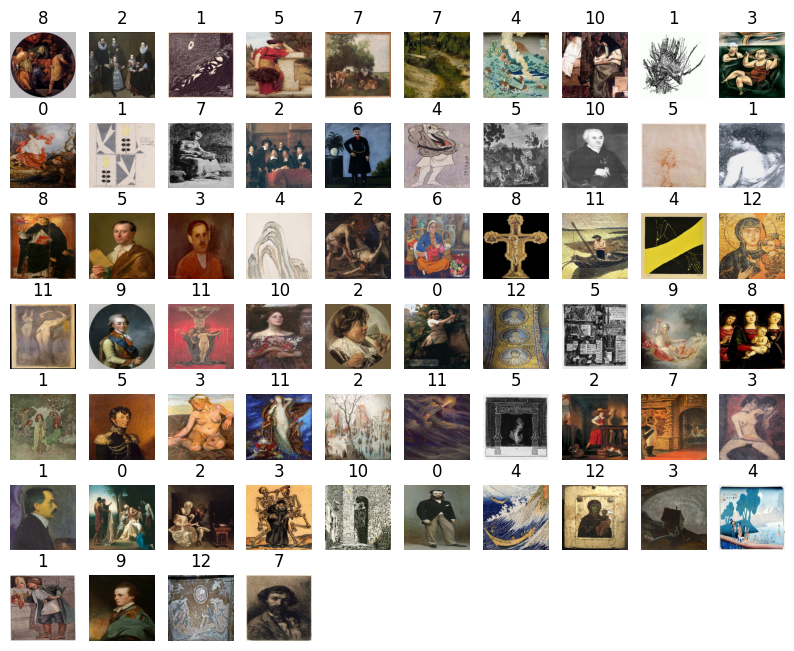

In [6]:
from ArtLib.artlib import ShowSamples

# Affichage d'échantillons du jeu d'entraînement
ShowSamples(train)

L'image montre un batch de ```64 échantillons```, ce qui correspond à la taille de lot spécifiée lors de la configuration du DataLoader. Ces images appartiennent à l'une des ```13 classes``` représentant les différents mouvements d'art, avec des étiquettes numériques allant de 0 à 12, identifiant chaque mouvement.

Cependant, sans connaissances approfondies en histoire de l'art, il peut être difficile de distinguer à quel mouvement certaines œuvres appartiennent. Cela s'explique par les similarités visuelles entre les œuvres de différents mouvements, notamment en ce qui concerne les thèmes récurrents (par exemple, les représentations humaines ou naturelles), les palettes de couleurs similaires ou les styles artistiques proches.

### **Ajout de la Data Augmentation**

In [7]:
data_augmentation_layers = [
        keras.layers.RandomFlip("horizontal"),
        keras.layers.RandomRotation(0.1),
]

def data_augmentation(images):
        for layer in data_augmentation_layers:
                images = layer(images)
        return images

augmented_train = train.map( lambda x, y: (data_augmentation(x), y))

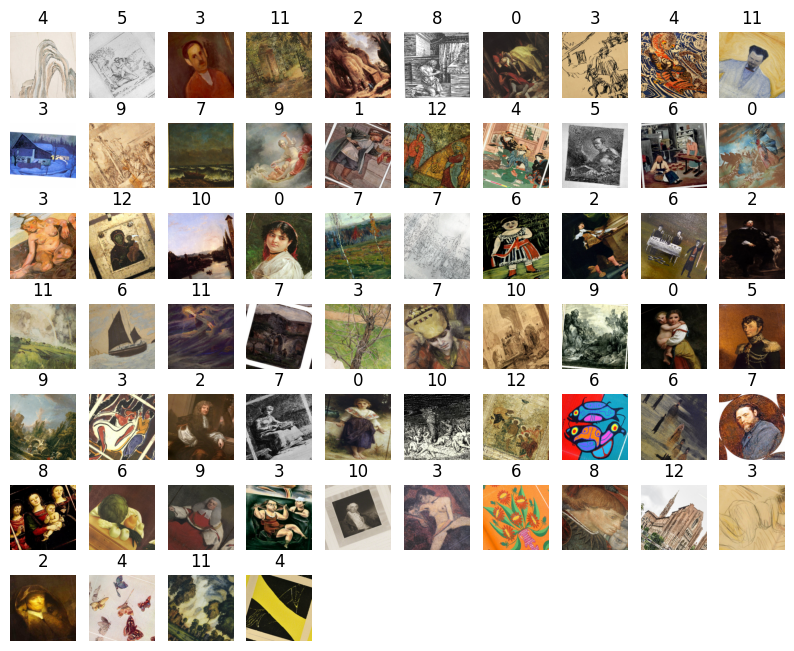

In [8]:
ShowSamples(augmented_train)

# **Reseau FC**

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

In [10]:
def build_fc_model(input_shape, num_classes,learning_rate,dropout = False):
    """
    Construit un modèle entièrement connecté (Fully Connected Network) avec des améliorations pour mieux capturer les caractéristiques des données et limiter le surapprentissage.

    Parameters:
        input_shape (tuple): La forme des données d'entrée sans les canaux (par ex., (128, 128) pour des images RGB de 128x128).
        num_classes (int): Nombre de classes à prédire (13 dans ce cas).

    Returns:
        model: Modèle Keras compilé.
    """
    # Compléter dynamiquement la troisième dimension (canaux de couleur)
    input_shape = (*input_shape, 3)  # Ajoute la troisième dimension

    # Construction du modèle
    model = keras.Sequential()

    # Entrée et prétraitement
    model.add(keras.Input(shape=input_shape))
    model.add(keras.layers.Rescaling(1.0 / 255))  # Normalisation des pixels entre 0 et 1

    # Extraction de caractéristiques via plusieurs couches denses
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(256, activation="relu"))
    if dropout:
        model.add(keras.layers.Dropout(0.3))  # Dropout pour limiter le surapprentissage

    model.add(keras.layers.Dense(128, activation="relu"))
    model.add(keras.layers.BatchNormalization())  # Normalisation pour stabiliser l'entraînement
    if dropout:    
        model.add(keras.layers.Dropout(0.3))

    model.add(keras.layers.Dense(64, activation="relu"))
    if dropout:
        model.add(keras.layers.Dropout(0.2))

    # Couche de sortie
    model.add(keras.layers.Dense(num_classes, activation="softmax"))  # Activation pour classification multi-classe

    # Compilation du modèle
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),  # Taux d'apprentissage modifiable
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),  # from_logits=False pour softmax
        metrics=['accuracy']
    )

    return model


In [11]:
# Construire le modèle
learning_rate = 0.001
fc_model = build_fc_model(INPUT_SHAPE, NUM_CLASSES,learning_rate)

In [12]:
import itertools
import pandas as pd

def generate_hyperparameter_combinations():
    """
    Génère des combinaisons d'hyperparamètres pour tester différents modèles.

    Returns:
        list[dict]: Liste de dictionnaires contenant les combinaisons d'hyperparamètres.
    """
    learning_rates = [0.01, 0.001, 0.0001]
    dropout_options = [True, False]
    data_augmentation = [True, False]
    combinations = list(itertools.product(learning_rates, dropout_options, data_augmentation))
    return [
        {"learning_rate": lr, "dropout": do, "data_augmentation": da}
        for lr, do, da in combinations
    ]

In [13]:
def train_model(train, augmented_train, valid, params):
    """
    Entraîne un modèle et retourne un dictionnaire contenant les métriques d'entraînement et de validation.

    Parameters:
        train (tf.data.Dataset): Jeu de données normal.
        augmented_train (tf.data.Dataset): Jeu de données avec augmentation.
        valid (tf.data.Dataset): Jeu de données de validation.
        params (dict): Hyperparamètres du modèle.

    Returns:
        dict: Dictionnaire contenant les hyperparamètres, les métriques d'entraînement et de validation.
    """
    print(params)
    dataset = augmented_train if params["data_augmentation"] else train
    model = build_fc_model(INPUT_SHAPE, NUM_CLASSES, params["learning_rate"], params["dropout"])
    
    # Entraînement avec l'ensemble de validation
    history = model.fit(
        dataset,
        validation_data=valid,  # Utilisation directe de `valid` comme ensemble de validation
        epochs=3,
        verbose=0,  # Réduire la sortie pour plus de lisibilité
    )
    
    # Récupérer toutes les métriques
    return {
        **params,
        "final_loss": history.history["loss"][-1],            # Dernière perte sur l'entraînement
        "final_accuracy": history.history["accuracy"][-1],    # Dernière précision sur l'entraînement
        "final_val_loss": history.history["val_loss"][-1],    # Dernière perte sur la validation
        "final_val_accuracy": history.history["val_accuracy"][-1]  # Dernière précision sur la validation
    }

In [14]:
def train_all_models(hyperparams, train, augmented_train,valid):
    """
    Itère sur les combinaisons d'hyperparamètres, entraîne les modèles, et retourne un DataFrame.

    Parameters:
        hyperparams (list[dict]): Liste des combinaisons d'hyperparamètres.
        train (tf.data.Dataset): Jeu de données normal.
        augmented_train (tf.data.Dataset): Jeu de données avec augmentation.
        input_shape (tuple): Forme des données d'entrée.
        num_classes (int): Nombre de classes de sortie.
        epochs (int): Nombre d'époques pour l'entraînement.

    Returns:
        pd.DataFrame: DataFrame contenant les performances pour chaque configuration.
    """
    results = [
        train_model(train, augmented_train, valid,params)
        for params in hyperparams
    ]
    return pd.DataFrame(results)

In [ ]:
# Exemple d'utilisation
hyperparams = generate_hyperparameter_combinations()
final_results = train_all_models(
    hyperparams=hyperparams,
    train=train,
    augmented_train=augmented_train,
    valid=valid
)

TypeError: train_model() missing 1 required positional argument: 'params'

In [17]:
sorted_df = final_results.sort_values(by="final_val_accuracy", ascending=False)
sorted_df

,learning_rate,dropout,data_augmentation,final_loss,final_accuracy
7,0.0010,False,False,2.277940,0.242147
6,0.0010,False,True,2.333552,0.224038
10,0.0001,False,True,2.350915,0.220833
11,0.0001,False,False,2.348057,0.218590
2,0.0100,False,True,2.353652,0.216026
3,0.0100,False,False,2.386643,0.193109
1,0.0100,True,False,2.484098,0.144712
0,0.0100,True,True,2.480125,0.137500
5,0.0010,True,False,2.581212,0.119551
4,0.0010,True,True,2.607174,0.108974
